#IMPORT LIBRARIES

In [ ]:
#pip install haversine

In [844]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# to calculate distance between restaurant and delivery location for feature engineering
from haversine import haversine

In [845]:
df = pd.read_csv('https://raw.githubusercontent.com/BryMat24/IE0005/main/train.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [846]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [847]:
n_rows, n_cols = df.shape
print(f"The training dataset has {n_rows:,} rows and {n_cols:,} columns")

The training dataset has 45,593 rows and 20 columns


#1. DATA CLEANING


In [848]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

###Updating Column Name - convert all into snake case form

In [849]:
# Create a dictionary to map the original column names to snake_case names
column_mapping = {col: col.lower().replace(' ', '_') for col in df.columns}

# Rename the columns using the dictionary
df = df.rename(columns=column_mapping)

# Rename the specific column
df = df.rename(columns={'time_taken(min)': 'time_taken', 'weatherconditions': 'weather_conditions'})

df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


###Dropping columns that are not used to build models

In [850]:
# Drop columns id and delivery_person_id
def drop_columns(df):
    df.drop(['id','delivery_person_id'],axis=1,inplace=True)

print("Before No. of columns: ",df.shape[1])
drop_columns(df)
print("After No. of columns: ",df.shape[1])

Before No. of columns:  20
After No. of columns:  18


###Clean time taken

In [851]:
# Extracting only the numeric part of the time_taken and convert its data type of int to int64
print("Data type of time_taken before conversion: ", df['time_taken'].dtype)
df['time_taken'] = df['time_taken'].apply(lambda x: int(x.split(' ')[1].strip()))
print("Data type of time_taken after conversion: ", df['time_taken'].dtype)

Data type of time_taken before conversion:  object
Data type of time_taken after conversion:  int64


In [852]:
# drop NaN values if any -> there are none
df['time_taken'].dropna()
df.count()

delivery_person_age            45593
delivery_person_ratings        45593
restaurant_latitude            45593
restaurant_longitude           45593
delivery_location_latitude     45593
delivery_location_longitude    45593
order_date                     45593
time_orderd                    45593
time_order_picked              45593
weather_conditions             45593
road_traffic_density           45593
vehicle_condition              45593
type_of_order                  45593
type_of_vehicle                45593
multiple_deliveries            45593
festival                       45593
city                           45593
time_taken                     45593
dtype: int64

In [853]:
df.dtypes

delivery_person_age             object
delivery_person_ratings         object
restaurant_latitude            float64
restaurant_longitude           float64
delivery_location_latitude     float64
delivery_location_longitude    float64
order_date                      object
time_orderd                     object
time_order_picked               object
weather_conditions              object
road_traffic_density            object
vehicle_condition                int64
type_of_order                   object
type_of_vehicle                 object
multiple_deliveries             object
festival                        object
city                            object
time_taken                       int64
dtype: object

###Clean weather condition



In [854]:
# extracting essential data in weather condition - removing the 'conditions' from each value
df['weather_conditions'] = df['weather_conditions'].str.replace('conditions ', '')
df["weather_conditions"].unique()

# we notice that there are missing values 'NaN', we will handle it later via imputation

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

###Clean Delivery Person Ratings

In [855]:
# removing rows where delivery_person_ratings with NaN and convert its datatype into float64
df = df.drop(df[df['delivery_person_ratings']=='NaN '].index)
df['delivery_person_ratings'] = df['delivery_person_ratings'].astype('float64')
df['delivery_person_ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4, 2.8,
       2.9, 3. ])

Number of entries with a rating of 6: 53


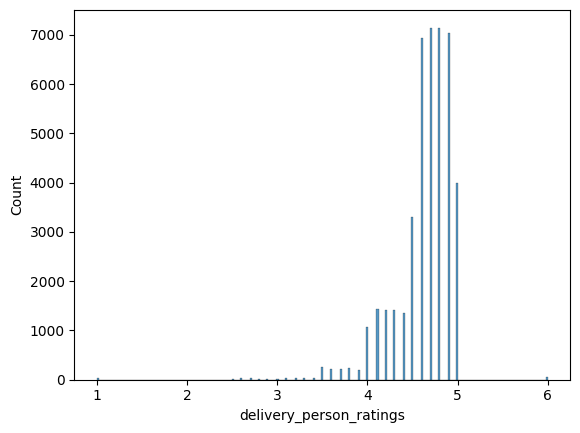

In [856]:
# we assume that 6 is an error, so we will replace it with 5
sb.histplot(data = df['delivery_person_ratings'])
count_6_ratings = len(df[df['delivery_person_ratings'] == 6])
print("Number of entries with a rating of 6:", count_6_ratings)

In [857]:
# Assuming 'delivery_person_ratings' is the column with the ratings
df['delivery_person_ratings'] = df['delivery_person_ratings'].replace(6, 5)

###Clean Delivery Person Age

In [858]:
df['delivery_person_age'] = df['delivery_person_age'].astype('int64')
df['delivery_person_age'].unique()

array([37, 34, 23, 38, 32, 22, 33, 35, 36, 21, 24, 29, 25, 31, 27, 26, 20,
       28, 39, 30, 15, 50])

###Handling NaN values in weather_condition via mode imputation

In [859]:
print(df["weather_conditions"].value_counts())
df['weather_conditions'] = df['weather_conditions'].replace('NaN', 'Fog')
print(df['weather_conditions'].unique())

Fog           7435
Stormy        7366
Cloudy        7277
Sandstorms    7238
Windy         7211
Sunny         7067
NaN             91
Name: weather_conditions, dtype: int64
['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']


###Handling NaN values in multiple_deliveries via Mode imputation



In [860]:
print(df["multiple_deliveries"].value_counts())

1       26936
0       13562
2        1913
NaN       933
3         341
Name: multiple_deliveries, dtype: int64


In [861]:
print("BEFORE: ", df["multiple_deliveries"].unique())
df['multiple_deliveries'] = df['multiple_deliveries'].replace('NaN ', '1')
print("AFTER: ", df["multiple_deliveries"].unique())

BEFORE:  ['0' '1' '3' 'NaN ' '2']
AFTER:  ['0' '1' '3' '2']


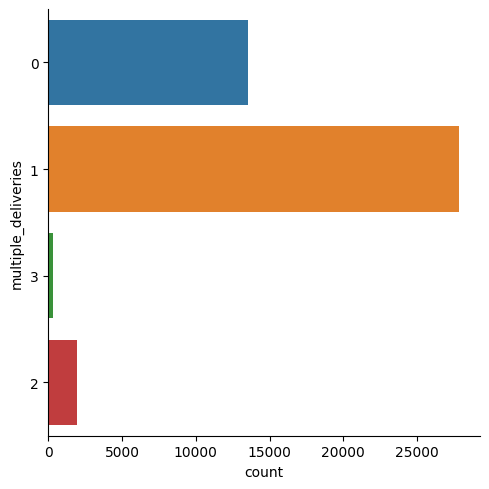

In [862]:
sb.catplot(y = "multiple_deliveries", data = df, kind = "count")

In [863]:
df['multiple_deliveries'] = df['multiple_deliveries'].astype(int)

###Handling NaN values in road_traffic_density via mode imputation

In [864]:
print("BEFORE: ", df["road_traffic_density"].unique())
df['road_traffic_density'] = df['road_traffic_density'].replace('NaN ', 'Low ')
print("AFTER: ", df["road_traffic_density"].unique())

BEFORE:  ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
AFTER:  ['High ' 'Jam ' 'Low ' 'Medium ']


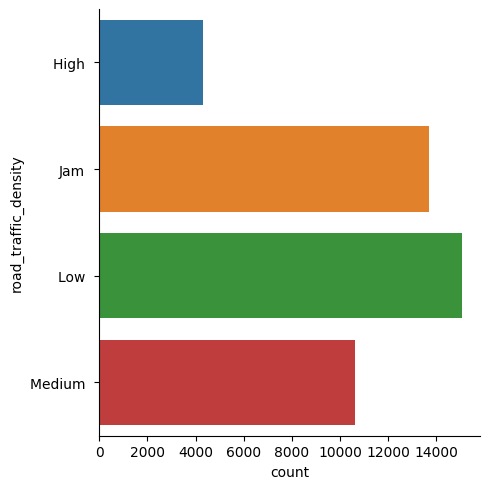

In [865]:
sb.catplot(y = "road_traffic_density", data = df, kind = "count")

###Handling NaN values in City column via mode imputation

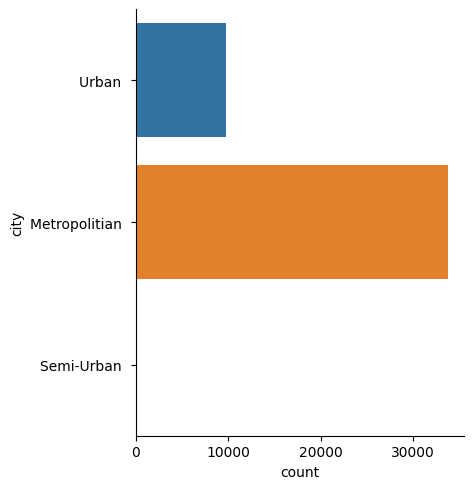

In [866]:
df["city"].unique()
df['city'] = df['city'].replace('NaN ', "Metropolitian ")
sb.catplot(y = "city", data = df, kind = "count")

###Handling NaN values in Festival column via mode imputation

In [867]:
print(df["festival"].value_counts())

No      42614
Yes       854
NaN       217
Name: festival, dtype: int64


In [868]:
print(df["festival"].unique())
df['festival'] = df['festival'].replace('NaN ', "No ")

['No ' 'Yes ' 'NaN ']


###Stripping spaces from columns

In [869]:
# strip space from type_of_vehicle
print("Before: ", df["type_of_vehicle"].unique())
df["type_of_vehicle"] = df["type_of_vehicle"].str.replace(" ", "")
df["type_of_vehicle"] = df["type_of_vehicle"].str.capitalize()
print("After: ", df["type_of_vehicle"].unique())

Before:  ['motorcycle ' 'scooter ' 'electric_scooter ' 'bicycle ']
After:  ['Motorcycle' 'Scooter' 'Electric_scooter' 'Bicycle']


In [870]:
# strip space from type_or_order
print("Before: ", df["type_of_order"].unique())
df["type_of_order"] = df["type_of_order"].str.replace(" ", "")
print("After: ", df["type_of_order"].unique())

Before:  ['Snack ' 'Drinks ' 'Buffet ' 'Meal ']
After:  ['Snack' 'Drinks' 'Buffet' 'Meal']


In [871]:
# strip space from road_traffic_density and also replacing the NaN values with the mode
print(df["road_traffic_density"].unique())
df["road_traffic_density"] = df["road_traffic_density"].str.replace(" ", "")
print(df["road_traffic_density"].unique())

['High ' 'Jam ' 'Low ' 'Medium ']
['High' 'Jam' 'Low' 'Medium']


In [872]:
# strip space from the city column
print(df["city"].unique())
df["city"] = df["city"].str.replace(" ", "")
print(df["city"].unique())

['Urban ' 'Metropolitian ' 'Semi-Urban ']
['Urban' 'Metropolitian' 'Semi-Urban']


In [873]:
# strip space from festival column
print(df["festival"].unique())
df["festival"] = df["festival"].str.replace(" ", "")
print(df["festival"].unique())

['No ' 'Yes ']
['No' 'Yes']


####FIXING LONGITUDE AND LATITUDE

In [874]:
df[df["restaurant_latitude"] < 0].head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken
92,34,4.7,-27.163303,78.057044,27.233303,78.127044,16-02-2022,23:00:00,23:05:00,Sandstorms,Low,1,Drinks,Scooter,0,No,Metropolitian,15
283,32,4.7,-27.165108,78.015053,27.225108,78.075053,13-02-2022,20:55:00,21:10:00,Sandstorms,Jam,2,Meal,Scooter,1,No,Metropolitian,31
1091,20,4.7,-15.546594,73.760431,15.606594,73.820431,13-02-2022,20:00:00,20:10:00,Cloudy,Jam,2,Drinks,Motorcycle,1,No,Metropolitian,29
1783,39,4.5,-23.230791,77.437020,23.250791,77.457020,13-02-2022,09:15:00,09:20:00,Cloudy,Low,0,Meal,Motorcycle,1,No,Metropolitian,29
1976,25,4.0,-22.539129,88.365507,22.549129,88.375507,15-02-2022,09:25:00,09:30:00,Sandstorms,Low,0,Buffet,Motorcycle,0,No,Metropolitian,19


Observations:

- The coordinates available in the dataset for the restaurant has issues
One of the sample coordinate is pointing to the South Pacific Ocean which is not possible

- However upon tested in google maps, taking the absolute value of the coordinates will point to the correct location as by the delivery_person_id (consistent with the geographic location of our dataset which is India)

In [875]:
# Change restaurant latitude and longitude to positive
df['restaurant_latitude'] = df['restaurant_latitude'].abs()
df['restaurant_longitude'] = df['restaurant_longitude'].abs()
df['delivery_location_latitude'] = df['delivery_location_latitude'].abs()
df['delivery_location_longitude'] = df['delivery_location_longitude'].abs()

In [876]:
def count_outliers_iqr(df, column_name, threshold=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    num_outliers = len(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)])

    return num_outliers

num_outliers = count_outliers_iqr(df, 'restaurant_latitude')
print(f"There are {num_outliers} outliers in the 'Restaurant_latitude' column.")
num_outliers = count_outliers_iqr(df, 'restaurant_longitude')
print(f"There are {num_outliers} outliers in the 'Restaurant_longitude' column.")
num_outliers = count_outliers_iqr(df, 'delivery_location_latitude')
print(f"There are {num_outliers} outliers in the 'Delivery_location_latitude' column.")
num_outliers = count_outliers_iqr(df, 'delivery_location_longitude')
print(f"There are {num_outliers} outliers in the 'Delivery_location_longitude' column.")

There are 0 outliers in the 'Restaurant_latitude' column.
There are 4312 outliers in the 'Restaurant_longitude' column.
There are 0 outliers in the 'Delivery_location_latitude' column.
There are 6423 outliers in the 'Delivery_location_longitude' column.


[Text(0.5, 0, 'Delivery Location Longitude')]

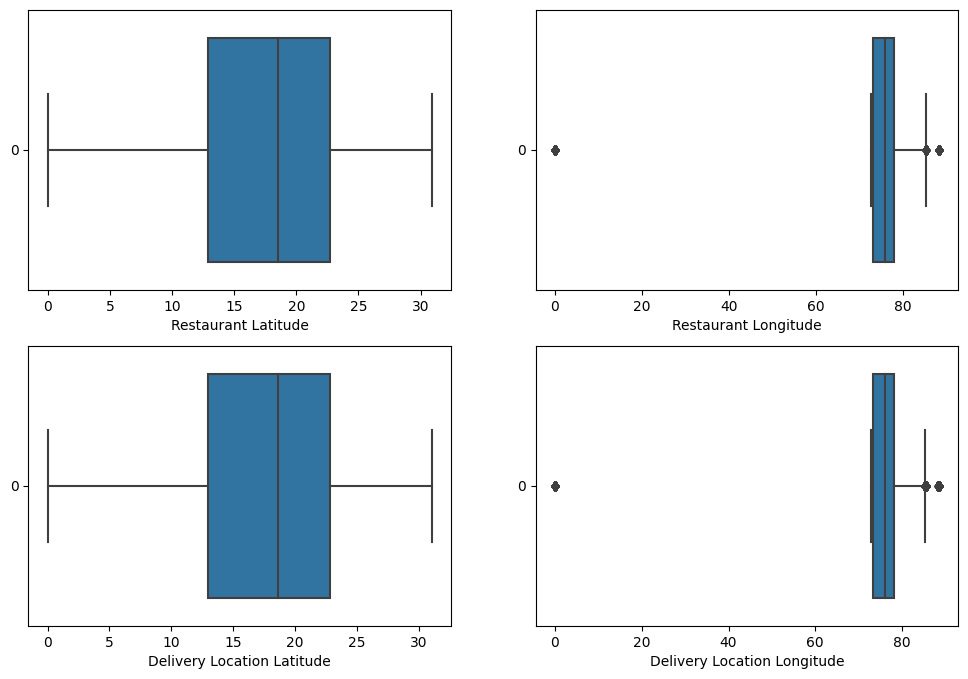

In [877]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sb.boxplot(data = df['restaurant_latitude'], orient = 'h', ax = axes[0,0])
axes[0,0].set(xlabel='Restaurant Latitude')

sb.boxplot(data = df['restaurant_longitude'], orient = 'h', ax = axes[0,1])
axes[0,1].set(xlabel='Restaurant Longitude')

sb.boxplot(data = df['delivery_location_latitude'], orient = 'h', ax = axes[1,0])
axes[1,0].set(xlabel='Delivery Location Latitude')

sb.boxplot(data = df['delivery_location_longitude'], orient = 'h', ax = axes[1,1])
axes[1,1].set(xlabel='Delivery Location Longitude')

- There are still outliers. The outliers doesn't make sense as it is not consistent with the geographic area of the dataset. So, we should drop them instead

In [878]:
# Calculate the IQR for each column
Q1_lat_restaurant = df['restaurant_latitude'].quantile(0.25)
Q3_lat_restaurant = df['restaurant_latitude'].quantile(0.75)
IQR_lat_restaurant = Q3_lat_restaurant - Q1_lat_restaurant

Q1_lon_restaurant = df['restaurant_longitude'].quantile(0.25)
Q3_lon_restaurant = df['restaurant_longitude'].quantile(0.75)
IQR_lon_restaurant = Q3_lon_restaurant - Q1_lon_restaurant

Q1_lat_delivery = df['delivery_location_latitude'].quantile(0.25)
Q3_lat_delivery = df['delivery_location_latitude'].quantile(0.75)
IQR_lat_delivery = Q3_lat_delivery - Q1_lat_delivery

Q1_lon_delivery = df['delivery_location_longitude'].quantile(0.25)
Q3_lon_delivery = df['delivery_location_longitude'].quantile(0.75)
IQR_lon_delivery = Q3_lon_delivery - Q1_lon_delivery

# Define the outlier threshold (you can adjust this threshold as needed)
outlier_threshold = 1

# Create boolean masks to identify outliers
outliers_lat_restaurant = (df['restaurant_latitude'] < Q1_lat_restaurant - outlier_threshold * IQR_lat_restaurant) | (df['restaurant_latitude'] > Q3_lat_restaurant + outlier_threshold * IQR_lat_restaurant)
outliers_lon_restaurant = (df['restaurant_longitude'] < Q1_lon_restaurant - outlier_threshold * IQR_lon_restaurant) | (df['restaurant_longitude'] > Q3_lon_restaurant + outlier_threshold * IQR_lon_restaurant)
outliers_lat_delivery = (df['delivery_location_latitude'] < Q1_lat_delivery - outlier_threshold * IQR_lat_delivery) | (df['delivery_location_latitude'] > Q3_lat_delivery + outlier_threshold * IQR_lat_delivery)
outliers_lon_delivery = (df['delivery_location_longitude'] < Q1_lon_delivery - outlier_threshold * IQR_lon_delivery) | (df['delivery_location_longitude'] > Q3_lon_delivery + outlier_threshold * IQR_lon_delivery)

# Combine the outlier masks to identify rows with outliers in any of the latitude or longitude columns
outliers_any = outliers_lat_restaurant | outliers_lon_restaurant | outliers_lat_delivery | outliers_lon_delivery

# Filter and drop rows with outliers
df = df[~outliers_any]

In [879]:
num_outliers = count_outliers_iqr(df, 'restaurant_latitude')
print(f"There are {num_outliers} outliers in the 'Restaurant_latitude' column.")
num_outliers = count_outliers_iqr(df, 'restaurant_longitude')
print(f"There are {num_outliers} outliers in the 'Restaurant_longitude' column.")
num_outliers = count_outliers_iqr(df, 'delivery_location_latitude')
print(f"There are {num_outliers} outliers in the 'Delivery_location_latitude' column.")
num_outliers = count_outliers_iqr(df, 'delivery_location_longitude')
print(f"There are {num_outliers} outliers in the 'Delivery_location_longitude' column.")

There are 0 outliers in the 'Restaurant_latitude' column.
There are 0 outliers in the 'Restaurant_longitude' column.
There are 0 outliers in the 'Delivery_location_latitude' column.
There are 0 outliers in the 'Delivery_location_longitude' column.


[Text(0.5, 0, 'Delivery Location Longitude')]

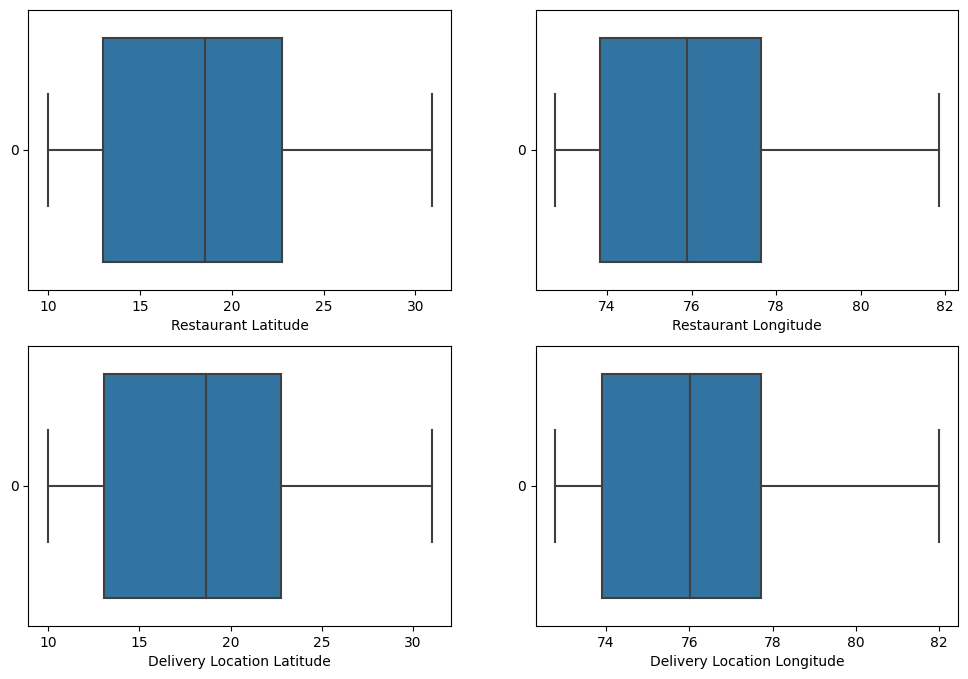

In [880]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sb.boxplot(data = df['restaurant_latitude'], orient = 'h', ax = axes[0,0])
axes[0,0].set(xlabel='Restaurant Latitude')

sb.boxplot(data = df['restaurant_longitude'], orient = 'h', ax = axes[0,1])
axes[0,1].set(xlabel='Restaurant Longitude')

sb.boxplot(data = df['delivery_location_latitude'], orient = 'h', ax = axes[1,0])
axes[1,0].set(xlabel='Delivery Location Latitude')

sb.boxplot(data = df['delivery_location_longitude'], orient = 'h', ax = axes[1,1])
axes[1,1].set(xlabel='Delivery Location Longitude')

In [886]:
# exporting the cleaned data
df.to_csv(r'train_cleaned.csv', index=False)

# 2. EXPLANATORY DATA ANALYSIS

In [888]:
df_clean = pd.read_csv('https://raw.githubusercontent.com/BryMat24/IE0005/main/train_cleaned.csv')
df_clean.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,Motorcycle,0,No,Urban,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,Scooter,1,No,Metropolitian,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,Motorcycle,1,No,Urban,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,Motorcycle,1,No,Metropolitian,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,Scooter,1,No,Metropolitian,30


In [889]:
print("ROWS, COLS:", df_clean.shape)
df_clean.info()

ROWS, COLS: (37076, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37076 entries, 0 to 37075
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   delivery_person_age          37076 non-null  int64  
 1   delivery_person_ratings      37076 non-null  float64
 2   restaurant_latitude          37076 non-null  float64
 3   restaurant_longitude         37076 non-null  float64
 4   delivery_location_latitude   37076 non-null  float64
 5   delivery_location_longitude  37076 non-null  float64
 6   order_date                   37076 non-null  object 
 7   time_orderd                  37076 non-null  object 
 8   time_order_picked            37076 non-null  object 
 9   weather_conditions           37076 non-null  object 
 10  road_traffic_density         37076 non-null  object 
 11  vehicle_condition            37076 non-null  int64  
 12  type_of_order                37076 non-null  objec

In [890]:
df_clean['time_taken'].describe()

count    37076.000000
mean        26.296175
std          9.359010
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: time_taken, dtype: float64

### Exploring numeric columns and its relation to time taken

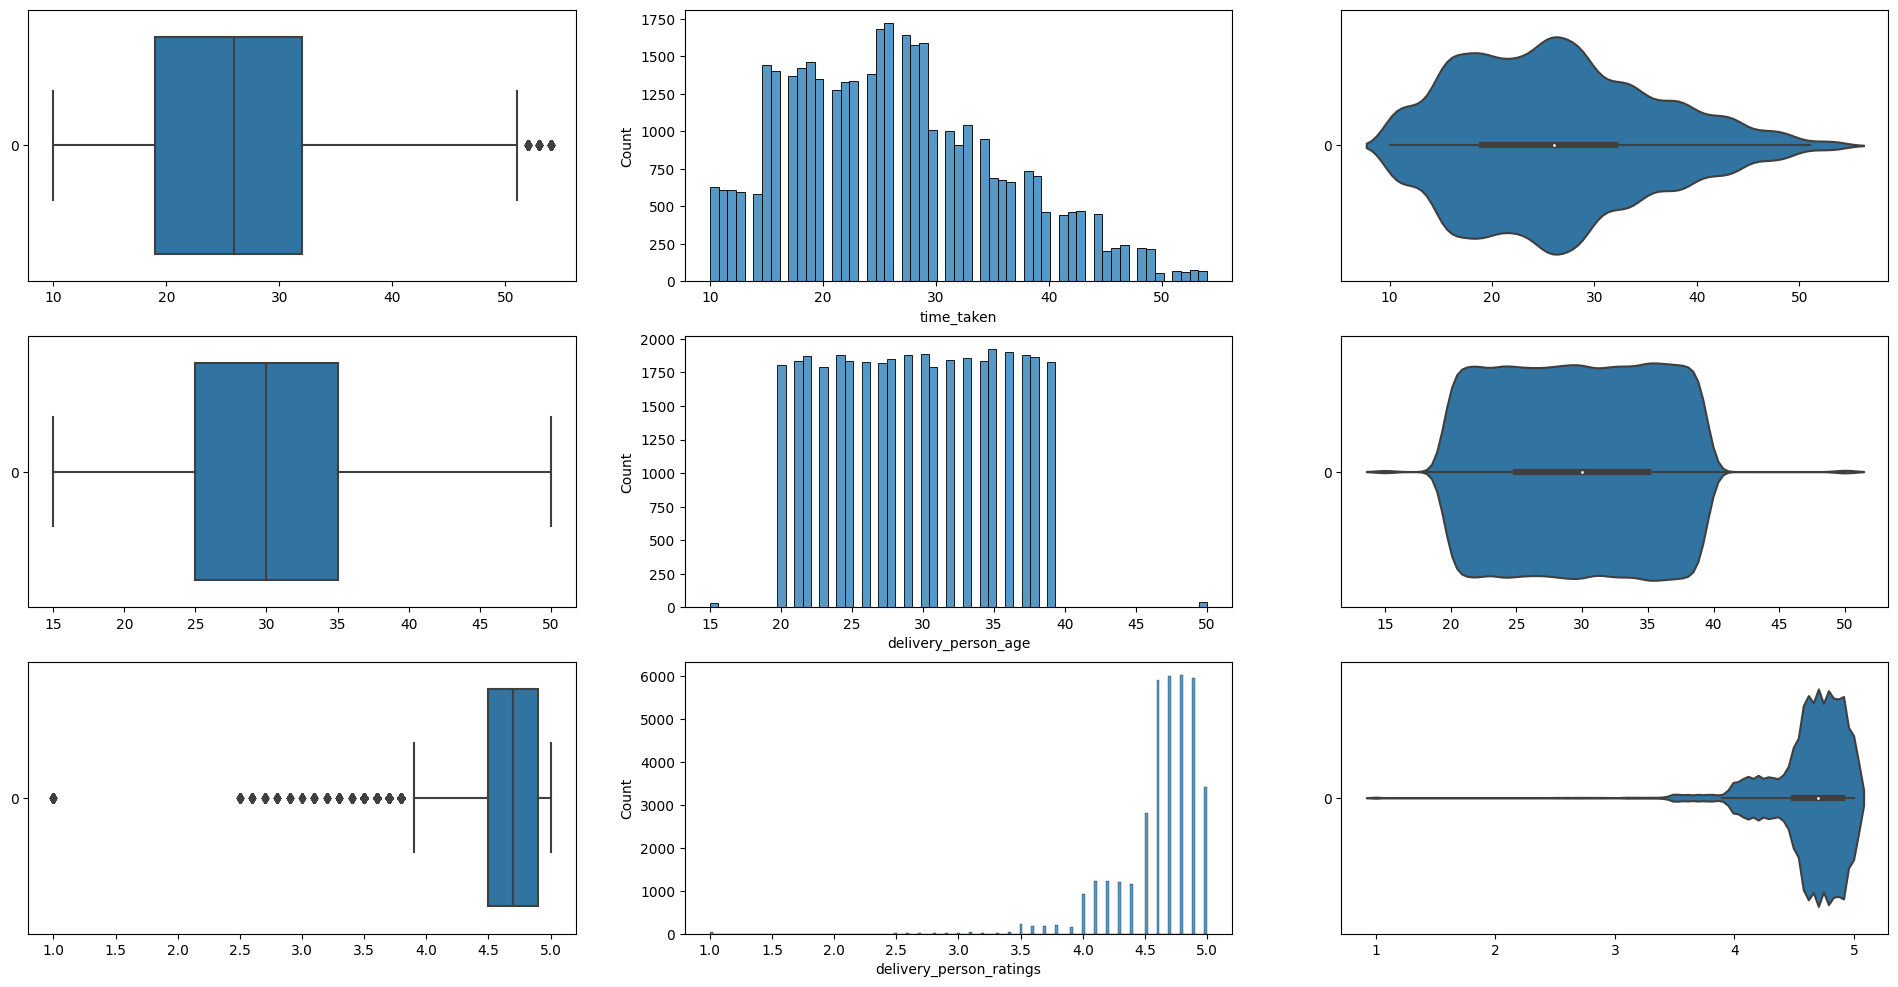

In [891]:
numDF = df_clean[["time_taken", "delivery_person_age", "delivery_person_ratings"]]
f, axes = plt.subplots(3, 3, figsize=(24, 12))

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

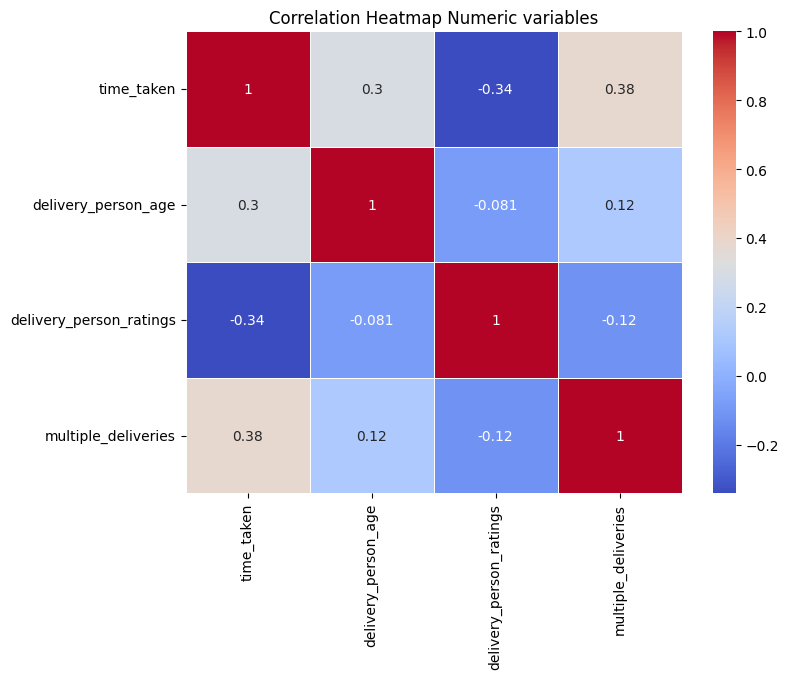

In [892]:
# plotting correlation between
df_num = df_clean[["time_taken", "delivery_person_age", "delivery_person_ratings", "multiple_deliveries"]]

# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap Numeric variables")
plt.show()

###Delivery time correlation with Age, Ratings and Multiple Deliveries

**Age (Positive Correlation):**
The positive correlation coefficient of 0.3 suggests a weak positive linear relationship between the age of the delivery person and the time taken for delivery. In other words, as the age of the delivery person increases, the time taken for delivery also tends to increase slightly. However, the correlation is relatively weak, meaning that age alone is not a strong predictor of delivery time.

**Delivery Person Ratings (Negative Correlation):**

The negative correlation between delivery person ratings and time taken indicates that as the delivery person's ratings increase (improve), the time taken for delivery tends to decrease.
This is as expected as customers tends to rate delivery persons higher when they provide faster and more efficient service.

**Multiple Deliveries (Positive Correlation):**

The positive correlation between multiple_deliveries and time taken suggests that when a delivery person is handling multiple deliveries at once, the time taken for each delivery tends to increase.
This is an intuitive result because delivering multiple orders in a single trip may naturally take more time than delivering a single order.

### Time Taken Distribution and relation with Categorical variables

In [893]:
catDF = pd.DataFrame(df_clean[['weather_conditions', 'road_traffic_density', 'vehicle_condition', 'type_of_order', 'type_of_vehicle', 'festival', 'city']])

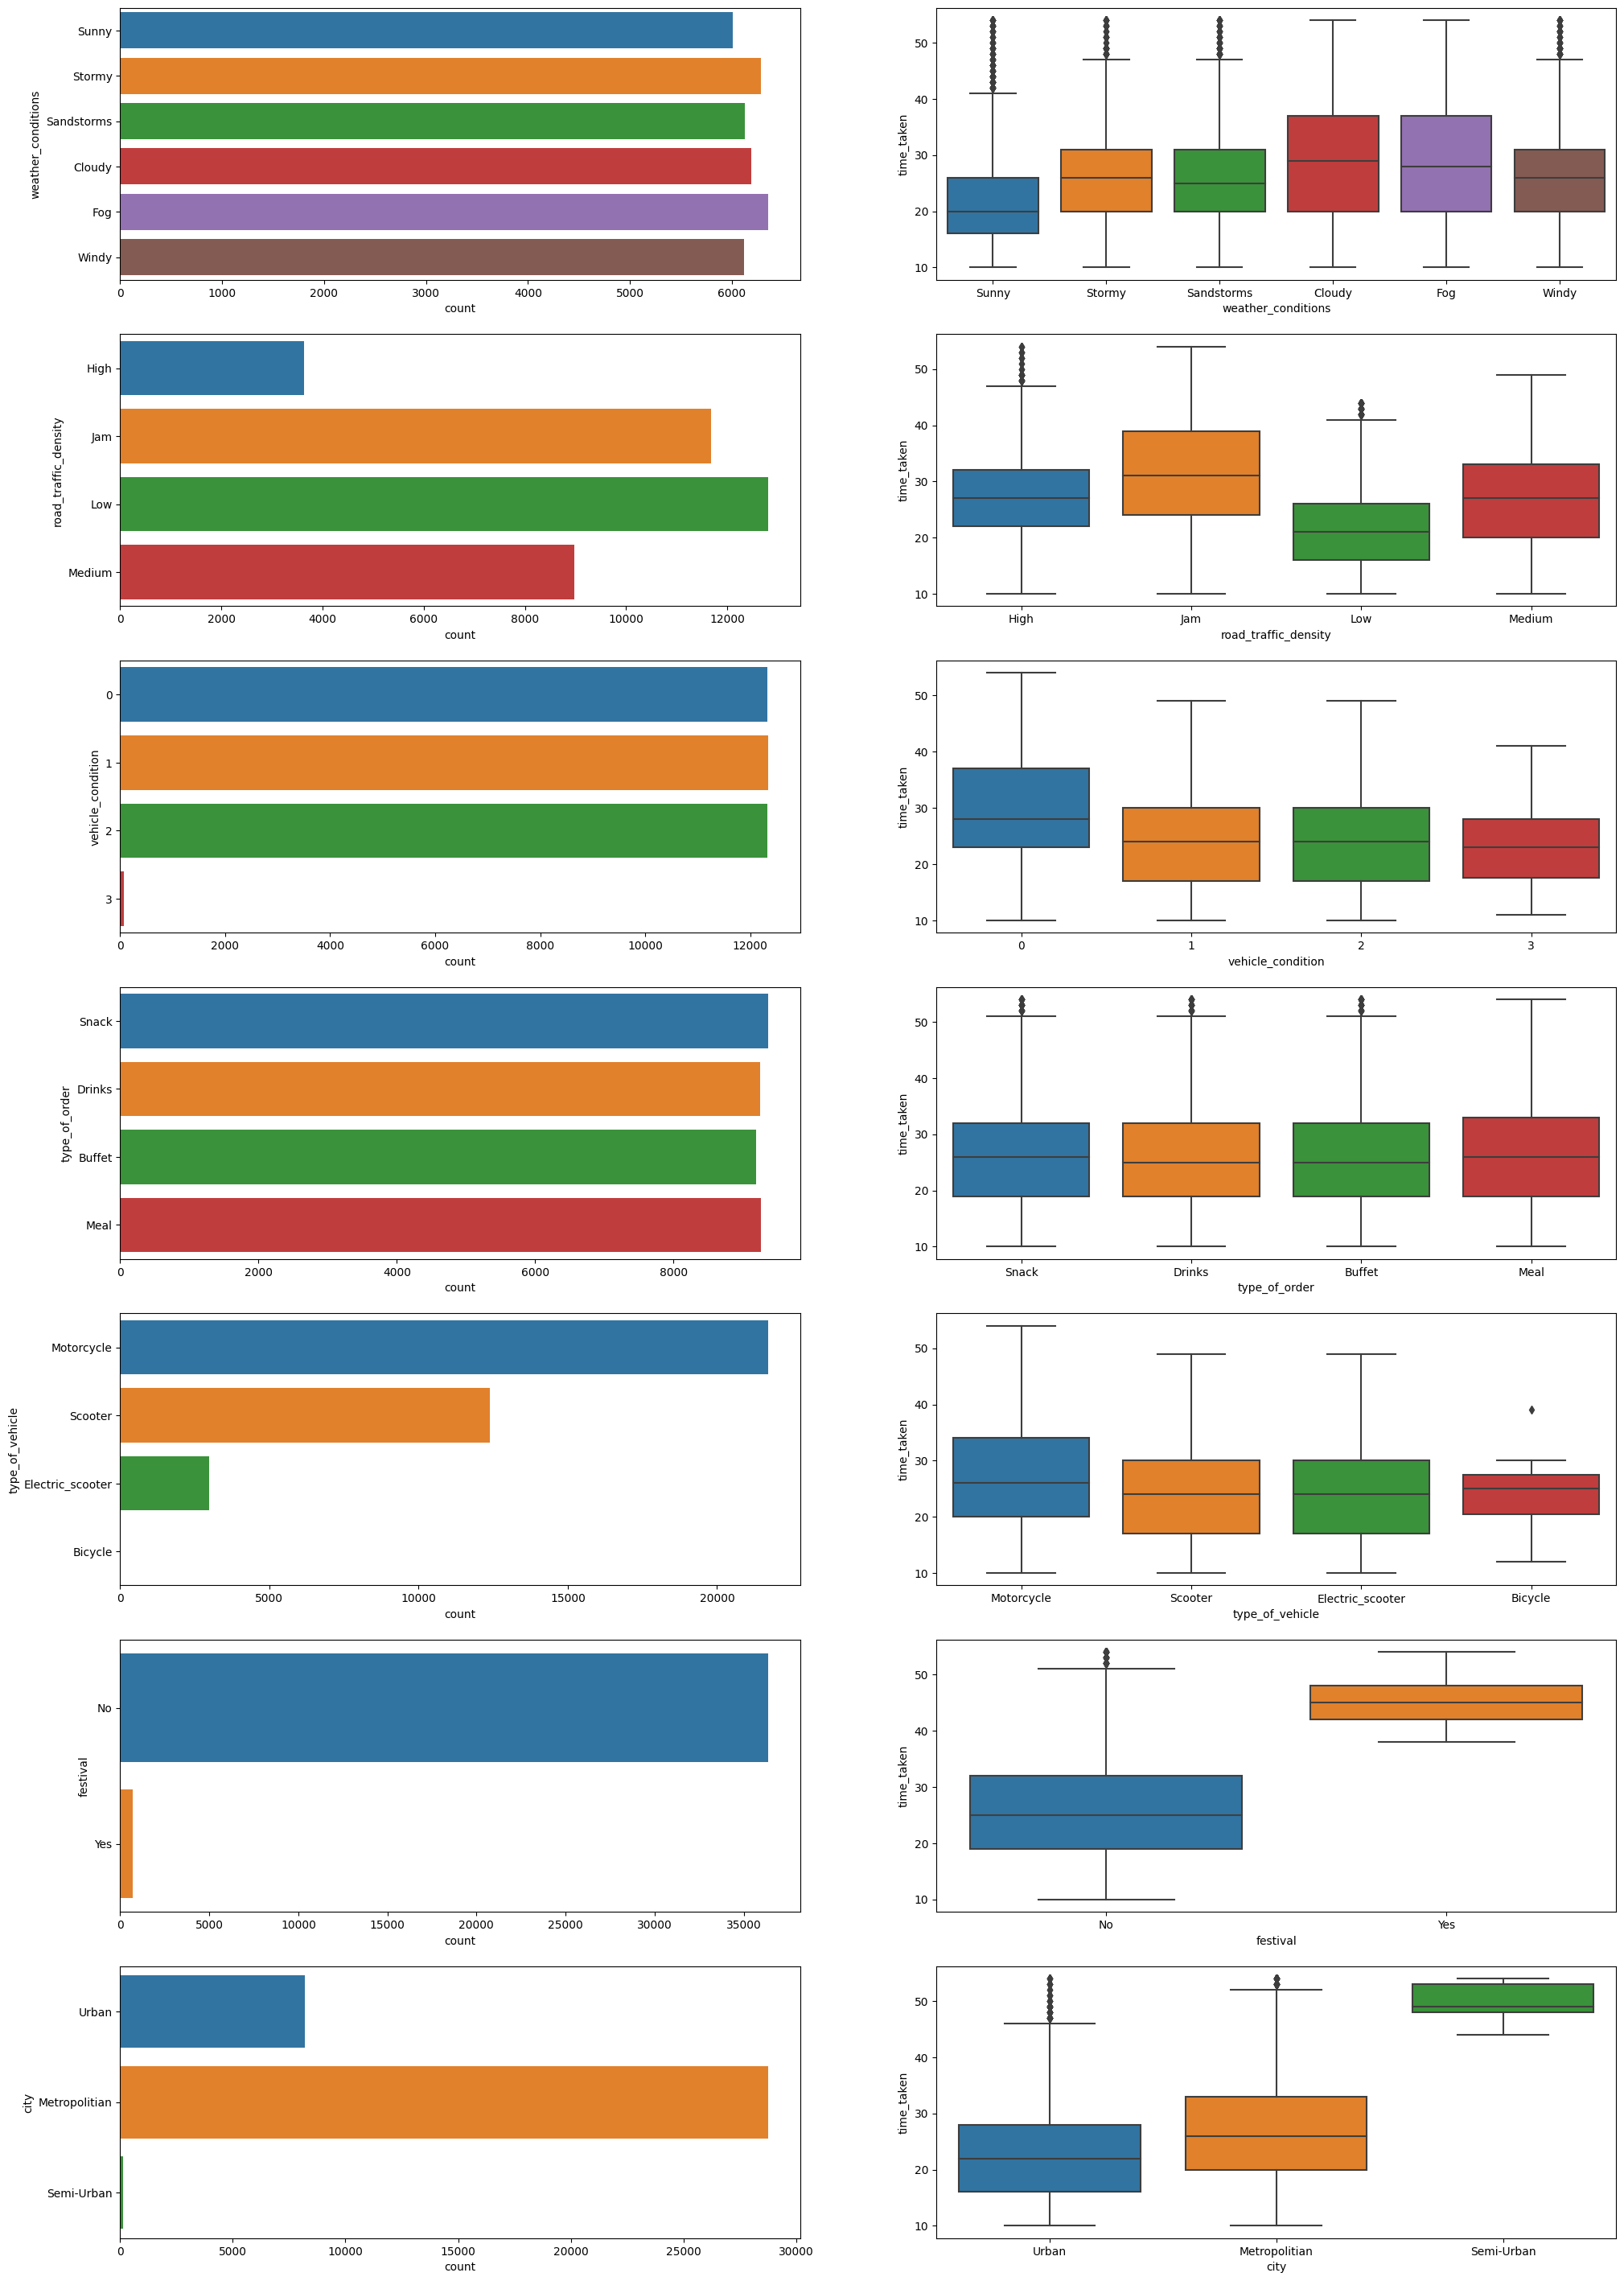

In [894]:
import seaborn as sb
import matplotlib.pyplot as plt

categoricalData = ['weather_conditions', 'road_traffic_density', 'vehicle_condition', 'type_of_order', 'type_of_vehicle', 'festival', 'city']

# Create subplots
f, axes = plt.subplots(len(categoricalData), 2, figsize=(24, 36))

for count, var in enumerate(categoricalData):
    # Create countplot
    sb.countplot(y=var, data=catDF, ax=axes[count, 0], orient="v")

    # Create boxplot
    sb.boxplot(data=df_clean, x=var, y='time_taken', ax=axes[count, 1])

plt.show()

### Categorical data that affects time taken

From the boxplot we can see the variables that affects time taken.

**weather** - we can see that although the distribution of the boxplot  is quite even for other weather aside from sunny, sunny weather has the lowest distribution of time taken which is as expected.

**traffic density** - As expected, a lower traffic will tends to have lower time taken.

**festival** - Festival" refers to a special event or occasion that is celebrated or observed on a particular day or over a period of time. During festivals, there may be increased demand for food deliveries, leading to potential delays due to higher order volumes and other factors associated with festive periods.

**city** - Here we see that semi-urban has the greatest difference from the other categories. It may be the lack of roads/pathways in these areas that lead to the increased time.

interesting discoveries: Initially we expect manual transport like bicycle will have significantly longer time taken. However, the distribution of all the data is fairly equal.





#### FEATURE ENGINEERING

In [895]:
# Define a function to calculate the distance in km
def calculate_distance(row):
    restaurant_coords = (row['restaurant_latitude'], row['restaurant_longitude'])
    delivery_coords = (row['delivery_location_latitude'], row['delivery_location_longitude'])
    return haversine(restaurant_coords, delivery_coords)

df_clean['distance'] = df_clean.apply(calculate_distance, axis=1)
df_clean.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken,distance
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,Motorcycle,0,No,Urban,24,3.025153
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,Scooter,1,No,Metropolitian,33,20.183558
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,Motorcycle,1,No,Urban,26,1.552760
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,Motorcycle,1,No,Metropolitian,21,7.790412
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,Scooter,1,No,Metropolitian,30,6.210147


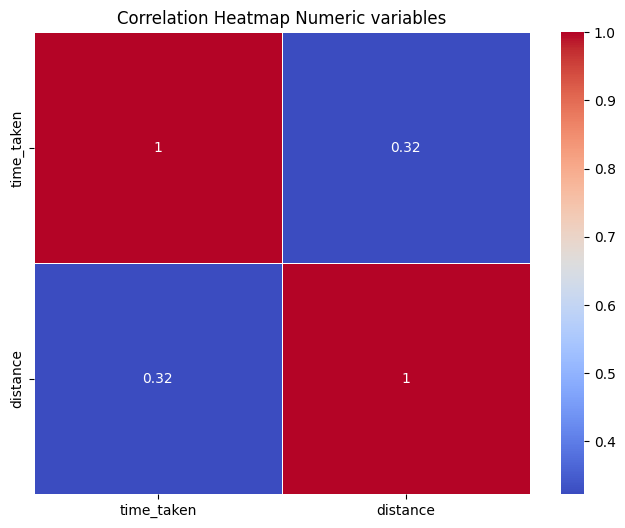

In [898]:
df_distance_time = pd.DataFrame(df_clean[['time_taken', 'distance']])

# Calculate the correlation matrix
correlation_matrix = df_distance_time.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap Numeric variables")
plt.show()

It can be observed that a correlation coefficient of 0.32 suggests that there is some degree of positive association between the two variables, but the relationship is not very strong just like the other numeric variables. Again, this might be due to categorical factors like weather conditions, traffic density and festival that might affect the relationship between distance and time taken, this makes it difficult to identify the independent effect of each numeric variable on the target.

eg. When multiple factors influence time taken for delivery, it can dilute the correlation between any two specific variables. For example, traffic density may slow down deliveries, making the effect of distance less prominent.


# 3. BUILDING OUR MODELS